# Métodos no supervisados y detección de anomalías: tarea de asignación (semana 3)
Ya conoces una gran variedad de métodos de agrupamiento y cómo pueden configurarse y ejecutarse utilizando las librerías *PyClustering* y *scikit-learn*. El objetivo de esta tarea es realizar el proceso completo de análisis de grupos, desde que se carga un conjunto de datos hasta que se valida el resultado del agrupamiento.

## Descripción de la tarea
La tarea consta de tres apartados:
1. Selección y análisis de un conjunto de datos.
2. Ejecución de dos métodos de agrupamiento.
3. Evaluación de los resultados obtenidos.

## Instrucciones
En este *notebook* no se presenta parte del código desarrollado, pero sí se indican los pasos mínimos que debes seguir para completar la tarea. Puedes añadir otras celdas de código según sea necesario, pero respetando la organización de apartados propuesta. Tendrás que elegir entre trabajar con *PyClustering* o con *scikit-learn*.


## 1. Selección y análisis de un conjunto de datos
Paso 1.1: Importa los paquetes necesarios.

In [112]:
#COMPLETAR
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.patches as mpatches
from sklearn.metrics import silhouette_score

Paso 1.2: Carga un conjunto de datos de entre los disponibles en la librería seleccionada. Puedes encontrarlos en:


*   PyClustering: https://github.com/annoviko/pyclustering/tree/master/pyclustering/samples
*   scikit-learn: https://scikit-learn.org/stable/datasets.html

Debes escoger un conjunto de datos etiquetado para que posteriormente se puedan aplicar medidas de validación externa.



In [113]:
#COMPLETAR
data = load_wine()

Paso 1.3: Muestra información acerca de la distribución de las características en el conjunto de datos elegido.

In [114]:
#COMPLETAR
wine_data = pd.DataFrame(data.data, columns = data.feature_names)

wine_data["class"] = data.target

print(wine_data.isnull().sum())

wine_data.describe().T

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


Paso 1.4: Selecciona dos características para llevar a cabo el agrupamiento, y muestra la distribución de los puntos con alguna gráfica.

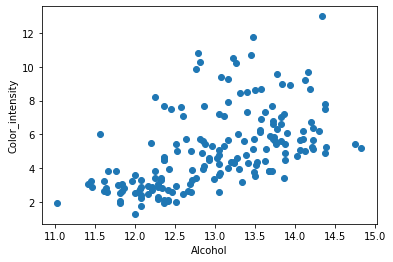

In [115]:
#COMPLETAR

x = wine_data["alcohol"]

y = wine_data["color_intensity"]

plt.scatter(x,y)
plt.xlabel("Alcohol")
plt.ylabel("Color_intensity")
plt.show()

Paso 1.5: Si es necesario, realiza un preprocesado de las variables (eliminar valores perdidos, escalar valores, etc).

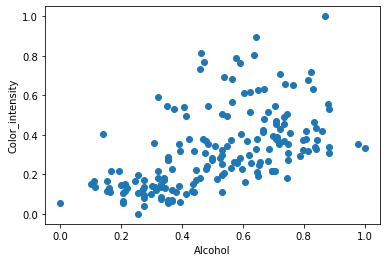

In [116]:
#COMPLETAR

scaler = MinMaxScaler()

old_shape = x.shape

x = scaler.fit_transform(x.values.reshape(-1, 1)).reshape(old_shape)

y = scaler.fit_transform(y.values.reshape(-1, 1)).reshape(old_shape)

plt.scatter(x,y)
plt.xlabel("Alcohol")
plt.ylabel("Color_intensity")
plt.show()

*Añade aquí una breve explicación de las decisiones tomadas en el apartado 1.*

## 2. Ejecución de métodos de agrupamiento
Paso 2.1: Especifica los parámetros para el primer método de agrupamiento elegido.

In [117]:
#COMPLETAR
kmeans = KMeans(n_clusters=3, random_state=0)

Paso 2.2: Ejecuta el primer método de agrupamiento.

In [118]:
#COMPLETAR
results_kmeans = kmeans.fit(np.array([x,y]).T)


Paso 2.3: Especifica los parámetros del segundo método de agrupamiento. Preferentemente, utiliza uno de una familia diferente al anterior.

In [119]:
#COMPLETAR
agglomerative = AgglomerativeClustering(n_clusters=3)

Paso 2.4: Ejecuta el segundo método de agrupamiento.

In [120]:
#COMPLETAR
results_agglo = agglomerative.fit(np.array([x,y]).T)

*Añade aquí una breve explicación de las decisiones tomadas en el apartado 2. En particular, explica en qué te has basado para elegir los parámetros de cada algoritmo y por qué has considerado adecuado utilizar esos dos algoritmos.*

## 3. Evaluación de los métodos de agrupamiento


Paso 3.1: Muesta la asignación de grupos (etiquetas) que ha obtenido cada método de agrupamiento.

In [121]:
#COMPLETAR
labels_kmeans = results_kmeans.labels_

print("El método K-means ha obtenido la siguiente agrupación:")
print(labels_kmeans)

labels_agglo = results_agglo.labels_

print("El método AgglomerativeClustering ha obtenido la siguiente agrupación:")
print(labels_agglo)

El método K-means ha obtenido la siguiente agrupación:
[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0 1 1 1 1 1 1 2 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 0 2 2 2 2 2 2 2]
El método AgglomerativeClustering ha obtenido la siguiente agrupación:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0
 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 2 1 0 0 0 0 0 0 0 2 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 1 2 2 0 0 2 2 2]


Paso 3.2: Visualiza la asignación de grupos obtenida por cada método de agrupamiento.

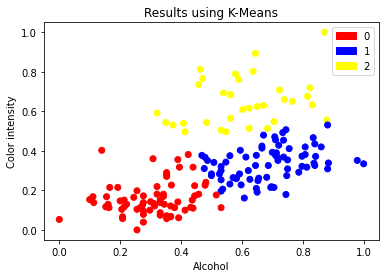

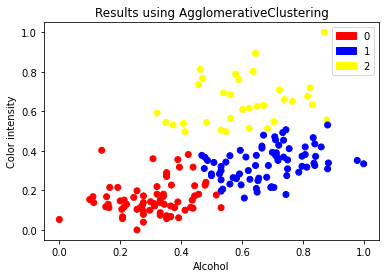

In [122]:
#COMPLETAR
colormap = np.array(['#FF0000', '#0000FF', '#FFFF00'])

class_0 = mpatches.Patch(color='#FF0000', label='0')
class_1 = mpatches.Patch(color='#0000FF', label='1')
class_2 = mpatches.Patch(color='#FFFF00', label='2')

plt.scatter(x,y, c=colormap[labels_kmeans])
plt.legend(handles=[class_0,class_1, class_2])
plt.title("Results using K-Means")
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.show()


plt.scatter(x,y, c=colormap[labels_kmeans])
plt.legend(handles=[class_0,class_1, class_2])
plt.title("Results using AgglomerativeClustering")
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.show()

Paso 3.3: Calcula al menos una medida de validación interna sobre cada asignación obtenida.

In [123]:
#COMPLETAR
def purity(particion_real:int, particion_obtenida:int):
  # COMPLETAR

  n_clus = {}

  # Inicializamos el diccionario con los distintos grupos
  for pt_o in np.unique(particion_obtenida):

    n_clus[str(pt_o)] = []

  # Creamos agrupaciones
  for pt_o, pt_r in zip(particion_obtenida, particion_real):

    n_clus[str(pt_o)].append(pt_r)

  numerator = 0

  # Seleccionamos el elemento más común del grupo y contamos el número de ocurrencias
  for key in n_clus.keys():

    most_common = max(set(n_clus[key]), key=n_clus[key].count)

    numerator += n_clus[key].count(most_common)

  return numerator / len(particion_obtenida)

In [124]:
purity_k_means = purity(wine_data["class"], labels_kmeans)
purity_agglo = purity(wine_data["class"], labels_agglo)

print("K-Means purity: " + str(purity_k_means))
print("AgglomerativeClustering purity: " + str(purity_agglo))

K-Means purity: 0.8146067415730337
AgglomerativeClustering purity: 0.7808988764044944


Paso 3.4: Utiliza el atributo de clase como partición de referencia y calcula al menos una medida de validación externa. Importante: Ten en cuenta que el orden de las etiquetas generadas por el método de agrupamiento podría no coincidir con el orden de las etiquetas reales. Es decir, debes comprobar que los puntos de una misma clase están agrupados juntos, con independencia del valor concreto de la etiqueta en la partición real y en la obtenida.

In [127]:
#COMPLETAR
labels_kmeans.sort()
labels_agglo.sort()

print(silhouette_score(wine_data, labels_kmeans))
print(silhouette_score(wine_data, labels_agglo))

0.09068652776020494
-0.013337072731313104


*Añade aquí una breve explicación de los resultados obtenidos en el apartado 3.*